# Aprendizaje Supervisado

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
mainpath = "../Datasets/"
filename = "HVAC_limpio.xlsx"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_excel(fullpath, "HVAC_limpio", index_col=0)
data.head()

Fecha- hora de lectura  POTENCIA TRAFO 2  POTENCIA TRAFO 3  \
0    2016-01-01 00:00:00          0.783603         38.338665   
1    2016-01-01 00:15:00          0.926969         38.338665   
2    2016-01-01 00:30:00          0.793163         38.455196   
3    2016-01-01 00:45:00          0.860073         38.688263   
4    2016-01-01 01:00:00          0.812257         38.688263   

   POTENCIA TRAFO 4  POTENCIA TRAFO 5  POTENCIA MEDIA CONECTADA  CONTROL FRÍO  \
0        232.182602        235.755234                557.290039     14.568556   
1        197.970230        113.384056                372.547760     14.568556   
2        211.676941        236.968918                469.299347     14.568556   
3        206.066818        298.481995                570.994995     14.568556   
4        193.984100        292.789215                563.804016     14.568556   

   POTENCIA BOMBA CALOR FELIPE  POTENCIA BOMBA CALOR CARLOS  \
0                     7.253334                     7.061334   
1                     0.800000                     0.480000   
2                     0.800000                     0.480000   
3                     0.800000                     0.480000   
4                     0.800000                     0.480000   

   TEMPERATURA AMBIENTE BOMBA CALOR CARLOS  ...  C_O_P MÁQUINA GRUPO FRÍO 1  \
0                                17.268667  ...                    8.099650   
1                                18.049334  ...                    8.099650   
2                                17.046000  ...                    4.030735   
3                                13.052667  ...                    4.101076   
4                                10.656666  ...                    3.959458   

   C_O_P MÁQUINA GRUPO FRÍO 2  C_O_P BOMBA CALOR CARLOS  \
0                   10.114581                  3.587883   
1                    5.319872                  3.643607   
2                   10.114581                  3.643607   
3                    3.683874                  3.643607   
4                    3.543089                  3.643607   

   C_O_P BOMBA CALOR FELIPE  TEMPERATURA SALIDA BOMBA CALOR CARLOS  \
0                  3.284228                              36.190666   
1                  3.356352                              33.625999   
2                  3.356352                              33.247997   
3                  3.356352                              32.989998   
4                  3.356352                              32.719997   

   TEMPERATURA SALIDA BOMBA CALOR FELIPE  \
0                              36.192665   
1                              32.770664   
2                              32.559998   
3                              32.559998   
4                              32.242664   

   KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS  \
0                                28599.992188   
1                               163366.671875   
2                               103306.765625   
3                                73883.296875   
4                                50396.769531   

   KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE  \
0                                26129.994141   
1                               193396.765625   
2                               137973.359375   
3                               102829.898438   
4                                81683.398438   

   KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1  \
0                               4400.000488   
1                              18550.000000   
2                             218650.000000   
3                             247150.000000   
4                             238550.000000   

   KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2  
0                              29349.998047  
1                             163519.944304  
2                              96750.000000  
3                             214850.000000  
4                             203300.000000  

[5 rows x 29 columns]

## Serie temporal

In [4]:
# agrupación de registros por dia
data3 = data.set_index("Fecha- hora de lectura").resample("D").mean()
data3

POTENCIA TRAFO 2  POTENCIA TRAFO 3  POTENCIA TRAFO 4  \
Fecha- hora de lectura                                                         
2016-01-01                      0.722190         38.577983        176.922608   
2016-01-02                      8.071871         37.730369        306.488193   
2016-01-03                     14.430977         37.083678        331.073247   
2016-01-04                     18.586373         37.122603        342.503359   
2016-01-05                     13.013384         36.556399        340.014443   
2016-01-06                     12.762064         35.826421        295.782721   
2016-01-07                     15.998167         35.890996        341.926874   
2016-01-08                     14.769279         36.596233        317.609073   
2016-01-09                     11.876310         37.321446        309.502430   
2016-01-10                     12.740802         36.339330        355.609142   
2016-01-11                     10.530211         37.107726        354.488571   
2016-01-12                     13.234472         28.530325        332.267661   
2016-01-13                     13.623264         26.633542        338.181250   
2016-01-14                     12.519028         27.232014        343.038196   
2016-01-15                      4.928889         29.077083        345.424029   
2016-01-16                      9.110208         27.265486        317.022848   
2016-01-17                     21.075953         29.041458        349.742015   
2016-01-18                      4.879792         28.986458        332.195417   
2016-01-19                     11.344375         27.018889        357.415693   
2016-01-20                     11.262292         27.239931        374.101528   
2016-01-21                     17.706659         30.541347        362.336390   
2016-01-22                     17.837624         29.279264        349.924931   
2016-01-23                     16.102552         29.957639        349.649443   
2016-01-24                     17.535652         29.028694        357.785556   
2016-01-25                     16.320885         29.028819        372.158751   
2016-01-26                     15.054889         28.588208        364.252777   
2016-01-27                     11.183472         28.798611        351.451249   
2016-01-28                     12.530417         28.614792        365.587778   
2016-01-29                     15.253941         29.656916        365.230833   
2016-01-30                     11.606756         29.074666        354.383403   
...                                  ...               ...               ...   
2018-03-08                     14.800901         23.997086        365.551063   
2018-03-09                     17.339527         26.354522        346.107089   
2018-03-10                     19.060722         25.516954        329.202269   
2018-03-11                     20.257130         24.084877        329.490987   
2018-03-12                     19.688726         25.447157        341.966918   
2018-03-13                     21.674011         28.826440        367.985487   
2018-03-14                     19.868684         25.691664        346.798134   
2018-03-15                     15.566119         25.204251        350.418634   
2018-03-16                     22.247346         25.099079        340.610068   
2018-03-17                     13.496861         25.338260        336.940774   
2018-03-18                     16.370853         27.185639        326.723726   
2018-03-19                     15.753565         28.147369        339.604285   
2018-03-20                     16.105479         27.259766        350.829625   
2018-03-21                     16.624387         24.181322        345.352350   
2018-03-22                     14.383758         25.742367        332.037420   
2018-03-23                     14.855462         24.065368        342.318762   
2018-03-24                     20.690349         25.113801        332.323105   
2018-03-25              

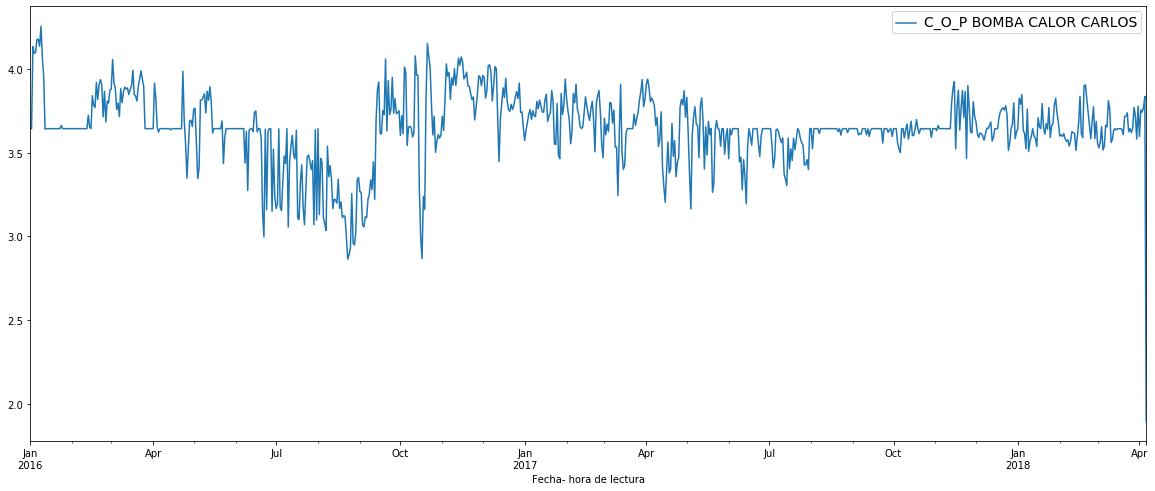

In [5]:
plot = data3['C_O_P BOMBA CALOR CARLOS'].plot(figsize=(20, 8))
legend = plt.legend()
legend.prop.set_size(14);

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# definir conjunto de datos
X = data3["C_O_P BOMBA CALOR CARLOS"]

# instanciar modelo
sarima_model = SARIMAX(X, order=(1,0,0), seasonal_order=(1, 0, 0, 12))

# ajustar modelo
results = sarima_model.fit()

# mirar el AIC
results.aic

-670.7150384357813

## Modelos de Clasificación

In [7]:
data2 = data
data2["label_cop_carlos"] = (data2["C_O_P BOMBA CALOR CARLOS"] > 3.5) & (data2["C_O_P BOMBA CALOR CARLOS"] < 4.5)
data2["label_cop_felipe"] = (data2["C_O_P BOMBA CALOR FELIPE"] > 3.5) & (data2["C_O_P BOMBA CALOR FELIPE"] < 4.5)
data2["label_cop_frio_1"] = (data2["C_O_P MÁQUINA GRUPO FRÍO 1"] > 3.5) & (data2["C_O_P MÁQUINA GRUPO FRÍO 1"] < 4.5)
data2["label_cop_frio_2"] = (data2["C_O_P MÁQUINA GRUPO FRÍO 2"] > 3.5) & (data2["C_O_P MÁQUINA GRUPO FRÍO 2"] < 4.5)
data2

Fecha- hora de lectura  POTENCIA TRAFO 2  POTENCIA TRAFO 3  \
0        2016-01-01 00:00:00          0.783603         38.338665   
1        2016-01-01 00:15:00          0.926969         38.338665   
2        2016-01-01 00:30:00          0.793163         38.455196   
3        2016-01-01 00:45:00          0.860073         38.688263   
4        2016-01-01 01:00:00          0.812257         38.688263   
5        2016-01-01 01:15:00          0.888717         38.688263   
6        2016-01-01 01:30:00          0.802738         38.688263   
7        2016-01-01 01:45:00          0.831385         38.688263   
8        2016-01-01 02:00:00          0.802729         38.688263   
9        2016-01-01 02:15:00          0.898297         38.688263   
10       2016-01-01 02:30:00          0.764496         38.688263   
11       2016-01-01 02:45:00          0.840958         38.688263   
12       2016-01-01 03:00:00          0.907860         38.688263   
13       2016-01-01 03:15:00          0.850489         38.688263   
14       2016-01-01 03:30:00          0.793161         38.688263   
15       2016-01-01 03:45:00          0.860039         38.688263   
16       2016-01-01 04:00:00          0.860057         38.688263   
17       2016-01-01 04:15:00          0.821814         38.688263   
18       2016-01-01 04:30:00          0.802738         38.688263   
19       2016-01-01 04:45:00          0.649816         38.090073   
20       2016-01-01 05:00:00          0.764503         38.804790   
21       2016-01-01 05:15:00          0.688040         38.804790   
22       2016-01-01 05:30:00          0.659378         38.804790   
23       2016-01-01 05:45:00          0.688053         38.804790   
24       2016-01-01 06:00:00          0.707171         38.804790   
25       2016-01-01 06:15:00          0.649824         38.804790   
26       2016-01-01 06:30:00          0.678497         38.804790   
27       2016-01-01 06:45:00          0.688048         38.804790   
28       2016-01-01 07:00:00          0.726270         38.804790   
29       2016-01-01 07:15:00          0.630708         38.804790   
...                      ...               ...               ...   
79255    2018-04-05 16:45:00         21.415659         49.314690   
79256    2018-04-05 17:00:00         21.415659         29.335971   
79257    2018-04-05 17:15:00         21.415659         29.335971   
79258    2018-04-05 17:30:00         21.415659         29.335971   
79259    2018-04-05 17:45:00         21.415659         53.670879   
79260    2018-04-05 18:00:00         21.415659         50.025482   
79261    2018-04-05 18:15:00         21.415659         29.335971   
79262    2018-04-05 18:30:00         21.415659         29.335971   
79263    2018-04-05 18:45:00         21.415659         54.136429   
79264    2018-04-05 19:00:00         21.415659         50.777836   
79265    2018-04-05 19:15:00         21.415659         29.335971   
79266    2018-04-05 19:30:00         21.415659         54.223717   
79267    2018-04-05 19:45:00         21.415659         36.217037   
79268    2018-04-05 20:00:00         21.415659         33.739662   
79269    2018-04-05 20:15:00         46.193169         30.085953   
79270    2018-04-05 20:30:00         30.842216         27.820570   
79271    2018-04-05 20:45:00         28.067196         30.081797   
79272    2018-04-05 21:00:00         29.345577         25.966696   
79273    2018-04-05 21:15:00         33.752350         25.966696   
79274    2018-04-05 21:30:00         26.736851         35.522873   
79275    2018-04-05 21:45:00         25.177851         36.441498   
79276    2018-04-05 22:00:00         23.915060         39.209835   
79277    2018-04-05 22:15:00         26.814800         32.600735   
79278    2018-04-05 22:30:00         26.814800         23.647276   
79279    2018-04-05 22:45:00         26.814800         32.891705   
79280    2018-04-05 23:00:00         26.814800         33.660686   
79281    2018-04-05 23:15:00         15.590000         24.9192

### Conjunto de entrenamiento y conjunto de testing

In [8]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = data2.columns.values.tolist()

subLista = [x for x in lista_variables if x not in variables_a_eliminar]
y_columns = ["label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]

X = data2[subLista]
y = data2[y_columns]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
len(X_test)

23786

### Árbol de decisión

In [10]:
from sklearn import tree

# Instantiate mode
model = tree.DecisionTreeClassifier()

# Train the model on training data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
from sklearn.metrics import accuracy_score

# accuracy_score
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9994534600184983

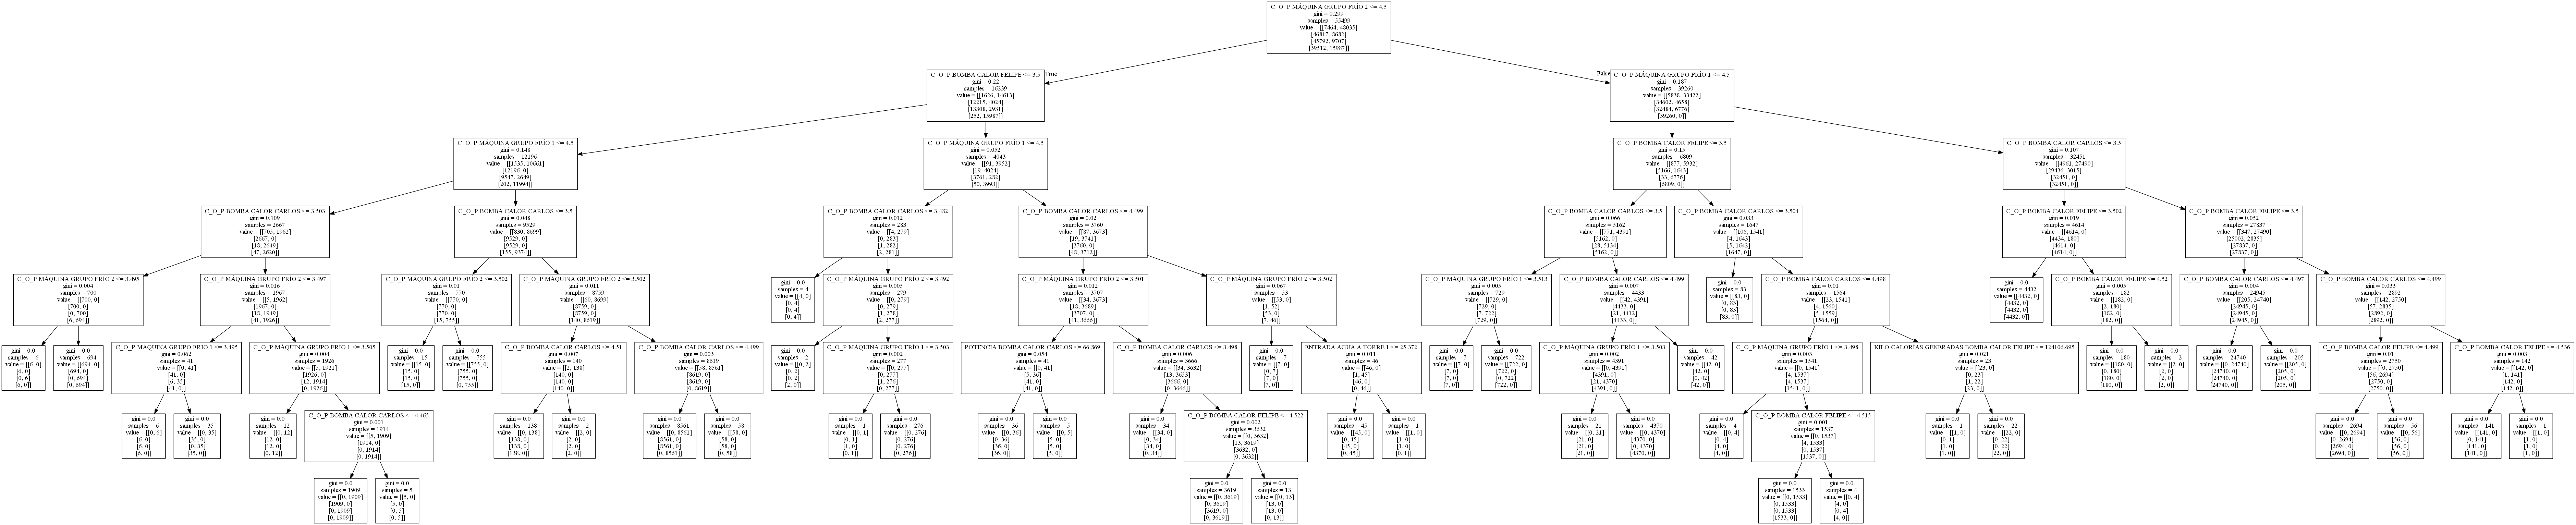

In [12]:
tree.export_graphviz(model, out_file='tree.dot', feature_names=X.columns)
myCmd = 'dot -Tpng tree.dot -o tree.png  '
os.system(myCmd)

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [14]:
# accuracy_score
rf.oob_score_

0.9991666516513811

In [15]:
# Extract single tree
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='treeRF.dot', 
                feature_names = X.columns,
                class_names = y.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

myCmd = 'dot -Tpng treeRF.dot -o treeRF.png  '
os.system(myCmd)

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'treeRF.png')

## Modelos de Prediccion